## ¿Que es MongoDB?

## Imports

In [1]:
from pokeapi import Pokemon, render
from random import randint

## pokeapi

bulbasaur: #1


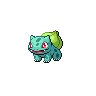

propiedades: ['name', 'height', 'base_experience', 'held_items', 'id', 'species', 'location_area_encounters', 'moves', 'order', 'types', 'abilities', 'stats', 'sprites', 'game_indices', 'is_default', 'forms', 'weight']


In [2]:
bulbasaur = Pokemon.catch(1)
render(bulbasaur)
print("propiedades: {}".format(list(bulbasaur.keys())))

#### Navegando el dictionary
Como `bulbasaur` es un objeto tipo `dict`, podemos explorar sus propiedades accediendo por el nombre de estas mediante la sintaxis `dict[key]`. Por ejemplo, veamos el nombre, peso y altura

In [3]:
nombre = bulbasaur["name"]
peso = bulbasaur["weight"]
altura = bulbasaur["height"]

print("nombre: {}, peso: {}, altura: {}".format(nombre, peso, altura))

nombre: bulbasaur, peso: 69, altura: 7


### PyMongo

In [4]:
from pymongo import MongoClient

##### conectar al cliente

In [5]:
client = MongoClient('mongo', 27017)

##### seleccionar base de datos

In [6]:
db = client.pokemon_db

# limpiar base de datos
db.drop_collection("pokemon")
print("pokemons: {}".format(db.pokemon.count()))

pokemons: 0


#### collections

In [7]:
db.pokemon

Collection(Database(MongoClient(host=['mongo:27017'], document_class=dict, tz_aware=False, connect=True), 'pokemon_db'), 'pokemon')

### insert

##### insert_one

In [8]:
db.pokemon.insert_one(bulbasaur)

print("pokemons: {}".format(db.pokemon.count()))

pokemons: 1


##### insert_many

In [9]:
pokemons = [ Pokemon.catch(i) for i in range(2, 150 + 1) ]

db.pokemon.insert_many(pokemons)

print("pokemons: {}".format(db.pokemon.count()))

pokemons: 150


### find

##### find_one

charmander: #4


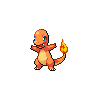

snorlax: #143


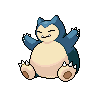

gastly: #92


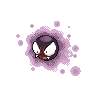

onix: #95


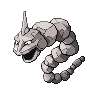

caterpie: #10


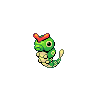

In [10]:
charmander = db.pokemon.find_one({"name": "charmander"})
render(charmander)

pokemon_pesado = db.pokemon.find_one({"weight": {"$gt": 3000}})
render(pokemon_pesado)

pokemon_liviano = db.pokemon.find_one({"weight": {"$lt": 2}})
render(pokemon_liviano)

pokemon_alto = db.pokemon.find_one({"height": {"$gt": 80}})
render(pokemon_alto)

pokemon_bajito = db.pokemon.find_one({"height": {"$lt": 5}})
render(pokemon_bajito)

##### find

arbok: #24


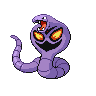

golem: #76


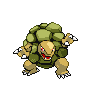

onix: #95


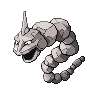

gyarados: #130


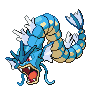

lapras: #131


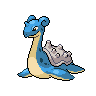

snorlax: #143


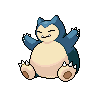

dragonair: #148


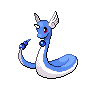

dragonite: #149


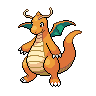

In [11]:
pokemons = db.pokemon.find({"$or": [
    {"weight": {"$gt": 2000}},
    {"height": {"$gt": 30}}
]})

for pokemon in pokemons:
    render(pokemon)

### update

##### update_one

pikachu: #25


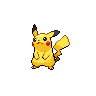

pika: #25


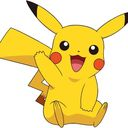

In [12]:
pikachu = db.pokemon.find_one({"id": 25})
render(pikachu)

db.pokemon.update_one({"id": 25}, {"$set": {
    "name": "pika", 
    "sprites.front_default": "http://pm1.narvii.com/6301/2031a6cf8a0e94b5ac962bc88b7b05339008a40f_128.jpg"
}})

pikachu = db.pokemon.find_one({"id": 25})
render(pikachu)

##### update_many

### delete

mewtwo: #150


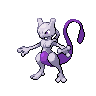

In [13]:
mewtwo = db.pokemon.find_one({"name": "mewtwo"})
render(mewtwo)

db.pokemon.delete_one({"name": "mewtwo"})

In [14]:
mewtwo = db.pokemon.find_one({"name": "mewtwo"})
print("mewtwo: {}".format(mewtwo))

print("pokemons: {}".format(db.pokemon.count()))

mewtwo: None
pokemons: 149


### aggregate

In [41]:
estadisticas = list(db.pokemon.aggregate(
   [
     {
         "$group":
         {
             "_id": None,
             "avg_weight": { "$avg": "$weight" },
             "avg_height": { "$avg": "$height" },
             "total_weight": { "$sum": "$weight" },
             "total_height": { "$sum": "$height" }
         }
     }
   ]
))[0]

estadisticas

{'_id': None,
 'avg_height': 11.946308724832214,
 'avg_weight': 457.2281879194631,
 'total_height': 1780,
 'total_weight': 68127}

# Tarea 1

La propiedad `types` es un array que contiene lo tipos del pokemon,  e.g. `dragonite` es tipo `dragon` y tipo `flying`.

In [55]:
db.pokemon.find_one({"name": "dragonite"})["types"]

[{'slot': 2,
  'type': {'name': 'flying', 'url': 'http://pokeapi.co/api/v2/type/3/'}},
 {'slot': 1,
  'type': {'name': 'dragon', 'url': 'http://pokeapi.co/api/v2/type/16/'}}]

##### Meta
Encontrar los **12** pokemons tipo `fire`. 

*Utiliza [$elemMatch](https://docs.mongodb.com/manual/reference/operator/query/elemMatch/#op._S_elemMatch) para selecionar documentos basados en las propiedades de un campo tipo `array`.*

Tipo Fuego: 12
charmander: #4


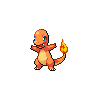

charmeleon: #5


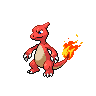

charizard: #6


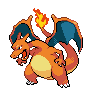

vulpix: #37


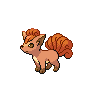

ninetales: #38


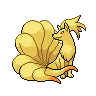

growlithe: #58


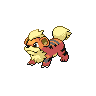

arcanine: #59


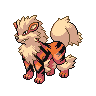

ponyta: #77


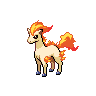

rapidash: #78


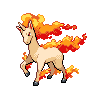

magmar: #126


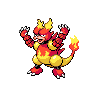

flareon: #136


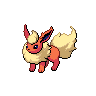

moltres: #146


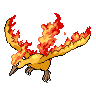

In [56]:
##########################
# Tu codigo va aqui
##########################

tipo_fuego = db.pokemon.find({"types": {"$elemMatch": {"type.name": "fire"}}})
tipo_fuego = list(tipo_fuego)

print("Tipo Fuego: {}".format(len(tipo_fuego)))
for pokemon in tipo_fuego:
    render(pokemon)

# Tarea 2

Utiliza `Pokemon.catch` para agregar de nuevo a Mewto (id: `150`) y los pokemon con `id` entre el `151` y `251`. 

In [60]:
##########################
# Tu codigo va aqui
##########################
pokemons = [ Pokemon.catch(i) for i in range(150, 251 + 1) ]
db.pokemon.insert_many(pokemons)

print("pokemons: {}".format(db.pokemon.count()))

pokemons: 251


# Tarea 3

Agrupa todos lo pokemons por su `type` principal (`slot 1`) y averigua cual es el tipo mas comun y el mas raro de pokemon.

Pistas:

* [$unwind](https://docs.mongodb.com/manual/reference/operator/aggregation/unwind/)

* [$match](https://docs.mongodb.com/manual/reference/operator/aggregation/match/)

* [$group](https://docs.mongodb.com/manual/reference/operator/aggregation/group/)

* [$sort](https://docs.mongodb.com/manual/reference/operator/aggregation/sort/)

In [76]:
groups = db.pokemon.aggregate([
    {
        "$unwind" : "$types"
    },
    {
        "$match": { "types.slot": 1 }
    },
    {
        "$group": { 
            "_id": "$types.type.name",
            "count": { "$sum" : 1 }
        }
    },
    {
        "$sort" : { "count" : -1 }
    }
])

groups = list(groups)
print(len(groups))
print(groups)



17
[{'_id': 'water', 'count': 46}, {'_id': 'normal', 'count': 37}, {'_id': 'bug', 'count': 22}, {'_id': 'grass', 'count': 21}, {'_id': 'fire', 'count': 20}, {'_id': 'psychic', 'count': 15}, {'_id': 'electric', 'count': 15}, {'_id': 'poison', 'count': 15}, {'_id': 'rock', 'count': 13}, {'_id': 'ground', 'count': 11}, {'_id': 'fighting', 'count': 9}, {'_id': 'fairy', 'count': 7}, {'_id': 'ice', 'count': 6}, {'_id': 'dark', 'count': 5}, {'_id': 'ghost', 'count': 4}, {'_id': 'dragon', 'count': 3}, {'_id': 'steel', 'count': 2}]
